<a href="https://colab.research.google.com/github/KHANG9102002/AI/blob/main/%C4%90%E1%BB%93_%C3%81n_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import các thư viện cần dùng
#pandas và numpy cho các quá trình xử lý data cơ bản
import pandas as pd
import numpy as np
#nltk để có thư viện xử lý ngôn ngữ tự nhiên
import nltk
#seaborn và matplotlib để trực quan hóa data
#Xử lý các url, hashtag bằng regex function
import re
import seaborn as sns
import matplotlib.pyplot as plt
#style để chọn style cho matplot, ở đây chúng ta dùng style
from matplotlib import style
style.use('ggplot')
#textblob để xử lý dữ liệu ký tự
from textblob import TextBlob
#tokenize để chia nhỏ văn bản thành các phần
from nltk.tokenize import word_tokenize
#PorterStemmer để biến đổi từ
from nltk.stem import PorterStemmer
#stop words để remove các stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
#WordCloud để trực quan hóa các từ được tìm kiếm nhiều sau khi chia thành positive, negative và neutral
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Mục mới

In [ ]:
df = pd.read_csv('/content/vaccination_tweets.csv')

In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10341 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     679
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [ ]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [ ]:
#Chỉ dùng cột text nên ta sẽ xóa hết các cột còn lại
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis=1)
text_df.head(20)

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...
5,Does anyone have any useful advice/guidance fo...
6,it is a bit sad to claim the fame for success ...
7,There have not been many bright days in 2020 b...
8,Covid vaccine; You getting it?\n\n #CovidVacci...
9,#CovidVaccine \n\nStates will start getting #C...


In [ ]:
#In 5 dòng đầu của dữ liệu trong cột text
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11020 non-null  object
dtypes: object(1)
memory usage: 86.2+ KB


In [ ]:
#Tạo một phương thức giúp xử lý đồng nhất dữ liệu
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
#Xóa đi các stop words
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
#Xử lý dữ liệu bằng phương thức đã được thiết lập
nltk.download('punkt')
text_df.text = text_df['text'].apply(data_processing)
print(text_df.text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
0        folks said daikon paste could treat cytokine s...
1        world wrong side history year hopefully bigges...
2        coronavirus sputnikv astrazeneca pfizerbiontec...
3        facts immutable senator even youre ethically s...
4        explain need vaccine borisjohnson matthancock ...
                               ...                        
11015    number covid19 cases today 17 november 2021 re...
11016                            first dose pfizerbiontech
11017    number covid19 cases today 16 november 2021 re...
11018    pfizerbiontech developed new pill paxlovid inc...
11019    number covid19 cases today 15 november 2021 re...
Name: text, Length: 11020, dtype: object


In [ ]:
#Xóa đi các dữ liệu đã bị lặp trong cột text (11020 GIẢM XUỐNG THÀNH 11013)
text_df = text_df.drop_duplicates('text')
print(text_df)

                                                    text
0      folks said daikon paste could treat cytokine s...
1      world wrong side history year hopefully bigges...
2      coronavirus sputnikv astrazeneca pfizerbiontec...
3      facts immutable senator even youre ethically s...
4      explain need vaccine borisjohnson matthancock ...
...                                                  ...
11014  ruvanw gmalavige chandi2012 already 3rd pfizer...
11015  number covid19 cases today 17 november 2021 re...
11017  number covid19 cases today 16 november 2021 re...
11018  pfizerbiontech developed new pill paxlovid inc...
11019  number covid19 cases today 15 november 2021 re...

[10543 rows x 1 columns]


In [ ]:
#Tạo phương thức biến đổi từ (stemming)
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [ ]:
#Thực hiện stemming cho dữ liệu
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [ ]:
text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [ ]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11013 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11013 non-null  object
dtypes: object(1)
memory usage: 172.1+ KB


In [ ]:
#Thiết lập phương thức tính popularity của dữ liệu bằng TextBlob
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
#Áp dụng phương thức popularity đã được thiết lập để xử lý dữ liệu
text_df['polarity'] = text_df['text'].apply(polarity)
print(text_df)

                                                    text  polarity
0      Same folks said daikon paste could treat a cyt...  0.000000
1      While the world has been on the wrong side of ... -0.500000
2      #coronavirus #SputnikV #AstraZeneca #PfizerBio...  0.000000
3      Facts are immutable, Senator, even when you're... -0.050000
4      Explain to me again why we need a vaccine @Bor...  0.000000
...                                                  ...       ...
11015  The number of Covid-19 cases today, 17 Novembe...  0.000000
11016                      First dose ✅\n#PfizerBioNTech  0.250000
11017  The number of Covid-19 cases today, 16 Novembe...  0.000000
11018  #PfizerBioNTech has developed new pill #Paxlov... -0.121212
11019  The number of Covid-19 cases today, 15 Novembe...  0.000000

[11013 rows x 2 columns]


In [ ]:
text_df.head(20)

,text,polarity
0,Same folks said daikon paste could treat a cyt...,0.000000
1,While the world has been on the wrong side of ...,-0.500000
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,0.000000
3,"Facts are immutable, Senator, even when you're...",-0.050000
4,Explain to me again why we need a vaccine @Bor...,0.000000
5,Does anyone have any useful advice/guidance fo...,0.400000
6,it is a bit sad to claim the fame for success ...,-0.100000
7,There have not been many bright days in 2020 b...,0.675000
8,Covid vaccine; You getting it?\n\n #CovidVacci...,0.000000
9,#CovidVaccine \n\nStates will start getting #C...,0.000000


In [ ]:
#Tạo 1 phương thức để chia dữ liệu thành negative, positive và neutral
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"
        

In [ ]:
#Áp dụng phương thức sentiment cho bảng dữ liệu
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [ ]:
text_df.head(20)

,text,polarity,sentiment
0,Same folks said daikon paste could treat a cyt...,0.000000,Neutral
1,While the world has been on the wrong side of ...,-0.500000,Negative
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,0.000000,Neutral
3,"Facts are immutable, Senator, even when you're...",-0.050000,Negative
4,Explain to me again why we need a vaccine @Bor...,0.000000,Neutral
5,Does anyone have any useful advice/guidance fo...,0.400000,Positive
6,it is a bit sad to claim the fame for success ...,-0.100000,Negative
7,There have not been many bright days in 2020 b...,0.675000,Positive
8,Covid vaccine; You getting it?\n\n #CovidVacci...,0.000000,Neutral
9,#CovidVaccine \n\nStates will start getting #C...,0.000000,Neutral


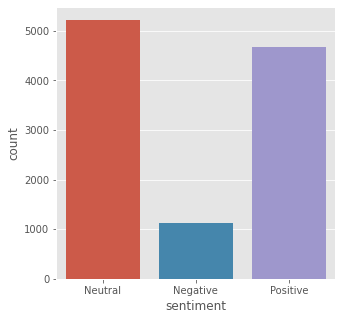

In [ ]:
#Sử dụng countplot để biểu diễn trực quan hóa sự phân bố của các mục sentiment
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

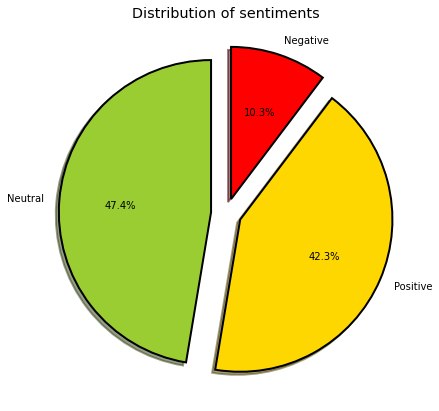

In [ ]:
#Biểu diễn theo phần trăm
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [ ]:
#Biểu diễn hình ảnh trực quan hóa các từ phổ biến trong các tweet có trong file dữ liệu theo mục positive, negative, neutral
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head(20)

,text,polarity,sentiment
6575,The best 😂😂😂😂\n#CovidVaccine #PfizerBiontech h...,1.0,Positive
9916,Ok. It’s been a day now. Can we please list th...,1.0,Positive
5923,Great news! Now let's scale up production worl...,1.0,Positive
5942,VACCINES WORK. \n\nExcellent news⤵️ \n\n@TheL...,1.0,Positive
5948,89.4% reduction in #COVIDー19 transmission. A g...,1.0,Positive
5987,Great news! #vaccines #PfizerBioNTech #PfizerV...,1.0,Positive
6106,Woohoo! \n💉second dose in!\nI am so happy abou...,1.0,Positive
6299,The best shot! 🖤 \n#Vaccinesavelives #PfizerBi...,1.0,Positive
1685,How happy my mother was after getting the #Pfi...,1.0,Positive
5889,@PRGuy17 #ScottytheQueueJumper resign...Austra...,1.0,Positive


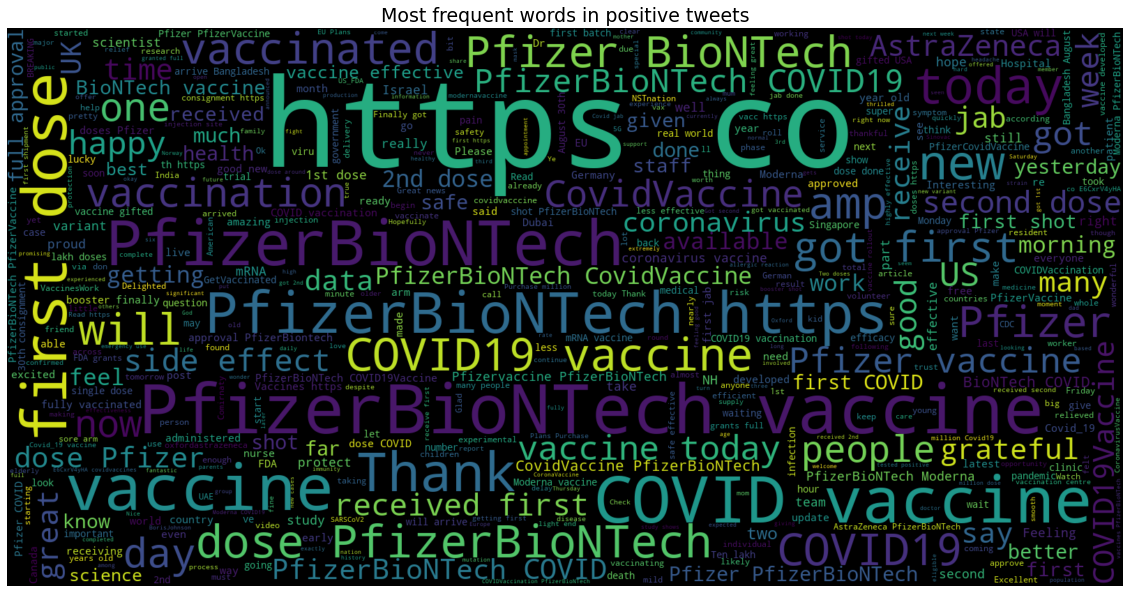

In [ ]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [ ]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head(20)

,text,polarity,sentiment
3940,"Vaccines can have side effects, but they are e...",-9.251859e-18,Negative
8172,"This should make ""vaccination-center"" life muc...",-4.166667e-03,Negative
7157,@Nas_k27 My second dose due end of next month ...,-6.250000e-03,Negative
2907,In 2015 we were worried about absence of mRNA ...,-6.250000e-03,Negative
5649,My arm is a little sore 😔 \nBut so far no othe...,-8.333333e-03,Negative
1323,"As a chef, if I am responsible for a customer'...",-8.333333e-03,Negative
2576,#PfizerBioNTech dose 2: ✅ \nSo far I’ve not be...,-8.333333e-03,Negative
3894,MRNA may just change the vaccine game. As a pe...,-8.333333e-03,Negative
575,https://t.co/ZGLZIy1yqQ\nDo u think Bill Gates...,-8.333333e-03,Negative
5436,@AnitaOakville #Canada way down to 38th for #v...,-9.595960e-03,Negative


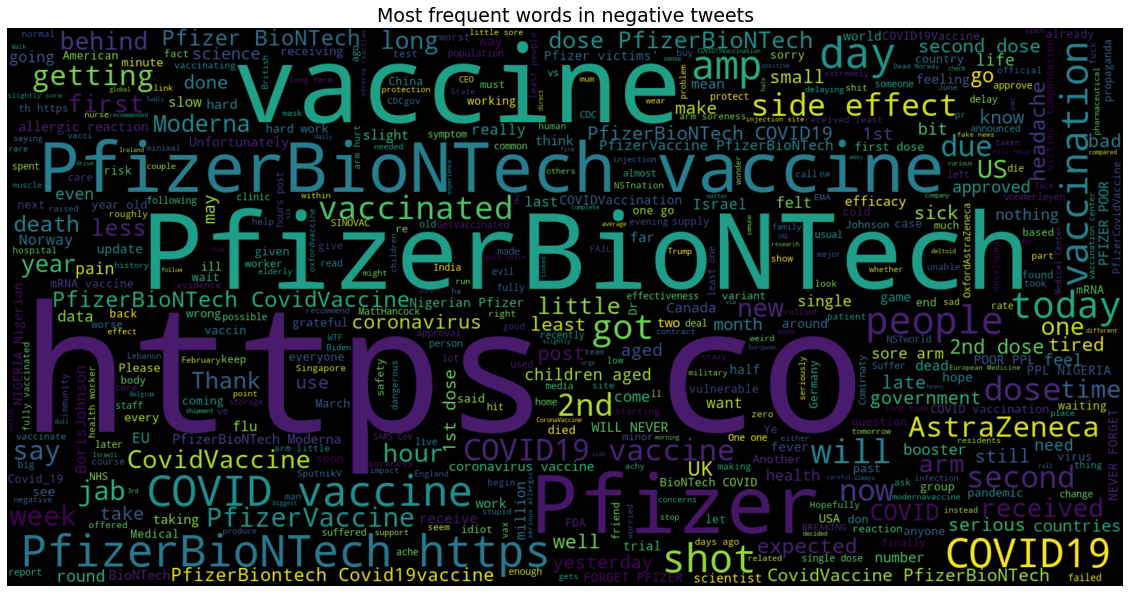

In [ ]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [ ]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head(20)

,text,polarity,sentiment
0,Same folks said daikon paste could treat a cyt...,0.0,Neutral
7557,2nd dose #PfizerBiontech #COVID19Vaccination h...,0.0,Neutral
7599,Had my second #PfizerBiontech #CovidVaccine do...,0.0,Neutral
7596,"#NSTnation A total of 25,770 cases or 3.5 per ...",0.0,Neutral
7595,#PfizerProud 👇🏻 of our leadership - #PFECollea...,0.0,Neutral
7594,Got that stabby stab of #pfizer in me today! #...,0.0,Neutral
7592,#Turkey begins administering #PfizerBioNTech #...,0.0,Neutral
7591,"That being said, I'm a pro-vaccine.\nGive me t...",0.0,Neutral
7590,NO #AprilFoolsPrank TO SEE HERE!!! Got my #fir...,0.0,Neutral
7588,Here's the compulsory Mom got her vaccine twee...,0.0,Neutral


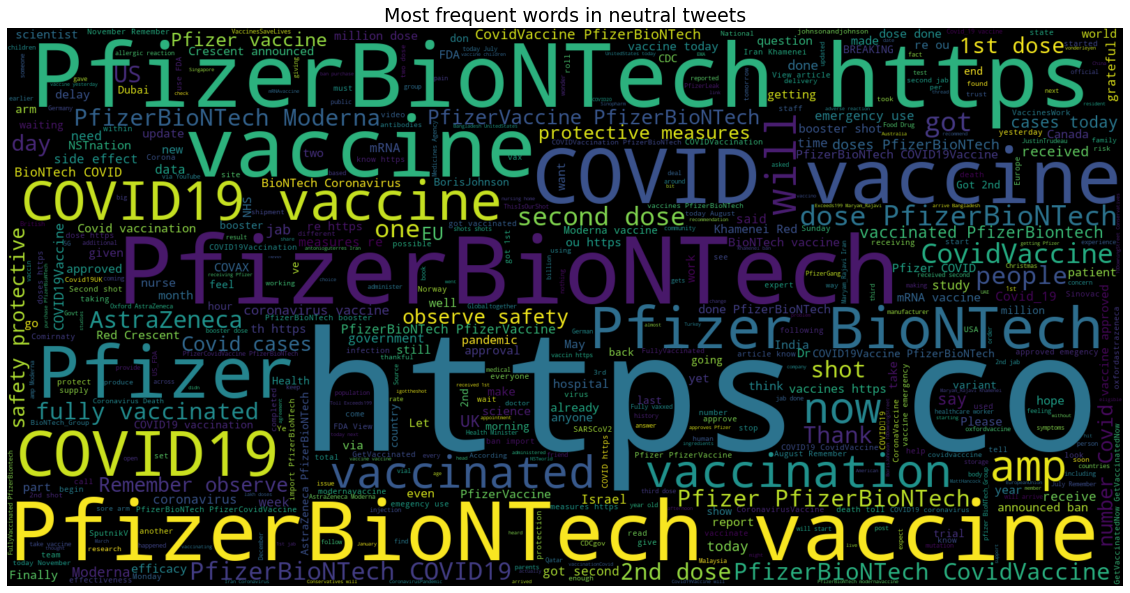

In [ ]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()